# WEEK 3

* Imports
* Mounting drive
* Exploratory Data Analysis
* Data Preprocessing


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dhanda/4.4k wala anil/Training.csv.zip'

Archive:  /content/drive/MyDrive/Dhanda/4.4k wala anil/Training.csv.zip
  inflating: Training.csv            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
traindf = pd.read_csv('/content/Training.csv')

In [ ]:
testdf = pd.read_csv('/content/drive/MyDrive/Dhanda/4.4k wala anil/Testing.csv')

In [ ]:
traindf.sample(10)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4150        0          0                     0                    0   
128         0          0                     0                    0   
3973        0          1                     0                    0   
499         0          0                     0                    0   
2793        0          0                     0                    0   
4220        0          0                     0                    0   
2631        0          0                     0                    0   
339         0          0                     0                    0   
2411        0          0                     0                    0   
4392        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4150          0       0           0             0        0                 0   
128           0       0           0             0        0                 0   
3973          0       0           0             0        0                 0   
499           0       0           0             0        0                 0   
2793          0       0           0             0        0                 0   
4220          0       0           0             0        0                 0   
2631          0       0           0             0        0                 0   
339           0       0           0             0        0                 0   
2411          0       0           0             0        0                 0   
4392          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
4150  ...         0             0                    0                     0   
128   ...         0             0                    0                     0   
3973  ...         1             0                    0                     0   
499   ...         0             0                    0                     0   
2793  ...         0             0                    0                     0   
4220  ...         0             0                    0                     0   
2631  ...         0             0                    0                     0   
339   ...         0             0                    0                     0   
2411  ...         0             0                    0                     0   
4392  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
4150                   0        0                     0                  0   
128                    0        0                     0                  0   
3973                   0        0                     0                  0   
499                    0        0                     0                  0   
2793                   0        0                     0                  0   
4220                   0        0                     0                  0   
2631                   0        0                     0                  0   
339                    0        0                     0                  0   
2411                   0        0                     0                  0   
4392                   0        0                     0                  0   

                                    prognosis  Unnamed: 133  
4150                         Bronchial Asthma           NaN  
128                      Cervical spondylosis           NaN  
3973                                     Acne           NaN  
499                           Gastroenteritis           NaN  
2793                      Peptic ulcer diseae           NaN  
4220                  Urinary tract infection           NaN  
2631                                Diabetes            NaN  
339                              Hypoglycemia           NaN  
2411  (vertigo) Paroymsal  Positional Vertigo

In [ ]:
testdf.sample(5)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
8         0          0                     0                    0          0   
16        1          1                     0                    0          0   
11        0          0                     0                    0          0   
2         0          0                     0                    0          0   
38        0          0                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
8        0           0             0        0                 0  ...   
16       0           0             0        0                 0  ...   
11       0           0             0        1                 0  ...   
2        0           0             1        1                 1  ...   
38       0           0             0        0                 0  ...   

    blackheads  scurring  skin_peeling  silver_like_dusting  \
8            0         0             0                    0   
16           0         0             0                    0   
11           0         0             0                    0   
2            0         0             0                    0   
38           0         0             0                    0   

    small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
8                      0                   0        0                     0   
16                     0                   0        0                     0   
11                     0                   0        0                     0   
2                      0                   0        0                     0   
38                     0                   0        0                     0   

    yellow_crust_ooze                prognosis  
8                   0          Gastroenteritis  
16                  0              Chicken pox  
11                  0                 Migraine  
2                   0                     GERD  
38                  0  Urinary tract infection  

[5 rows x 133 columns]

In [ ]:
for col in traindf.columns:
  print(f'number of classes and missing values in {col}:')
  for unique_val in traindf[col].unique():
    num = sum(traindf[col]==unique_val)
    print(f'{unique_val}: \t\t{num}')
  num_miss = sum(traindf[col].isnull())
  print(f'percentage of missing value:{(num_miss*100)/(traindf.shape[0])} %')
  print('*'*100)
  print()

number of classes and missing values in itching:
1: 		678
0: 		4242
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in skin_rash:
1: 		786
0: 		4134
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in nodal_skin_eruptions:
1: 		108
0: 		4812
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in continuous_sneezing:
0: 		4698
1: 		222
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in shivering:
0: 		4812
1: 		108
percentage of missing value:0.0 %
*****************************************************

In [ ]:
for col in testdf.columns:
  print(f'number of classes and missing values in {col}:')
  for unique_val in testdf[col].unique():
    num = sum(testdf[col]==unique_val)
    print(f'{unique_val}: \t\t{num}')
  num_miss = sum(testdf[col].isnull())
  print(f'percentage of missing value:{(num_miss*100)/(testdf.shape[0])} %')
  print('*'*100)
  print()

number of classes and missing values in itching:
1: 		7
0: 		35
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in skin_rash:
1: 		8
0: 		34
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in nodal_skin_eruptions:
1: 		1
0: 		41
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in continuous_sneezing:
0: 		40
1: 		2
percentage of missing value:0.0 %
****************************************************************************************************

number of classes and missing values in shivering:
0: 		41
1: 		1
percentage of missing value:0.0 %
*************************************************************************

In [ ]:
# We see unnamed 133 is of no use so delete it
traindf.drop(['Unnamed: 133'],axis = 1, inplace = True)


In [ ]:
traindf.sample(10)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2557        0          0                     0                    0   
4224        0          0                     0                    1   
2734        0          0                     0                    0   
4197        0          0                     0                    0   
4418        0          0                     0                    0   
475         0          0                     0                    0   
3608        1          1                     1                    0   
93          0          0                     0                    0   
4481        0          0                     0                    0   
3143        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2557          0       1           0             0        0                 0   
4224          1       1           0             0        0                 0   
2734          0       0           0             0        0                 0   
4197          0       1           0             0        0                 0   
4418          0       0           0             0        0                 0   
475           0       0           0             0        0                 0   
3608          0       0           0             0        0                 0   
93            0       0           0             0        0                 0   
4481          0       0           0             0        0                 0   
3143          0       1           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
2557  ...           0         0             0                    0   
4224  ...           0         0             0                    0   
2734  ...           0         0             0                    0   
4197  ...           0         0             0                    0   
4418  ...           0         0             0                    0   
475   ...           0         0             0                    0   
3608  ...           0         0             0                    0   
93    ...           0         0             0                    0   
4481  ...           0         0             0                    0   
3143  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
2557                     0                   0        0                     0   
4224                     0                   0        0                     0   
2734                     0                   0        0                     0   
4197                     0                   0        0                     0   
4418                     0                   0        0                     0   
475                      0                   0        0                     0   
3608                     0                   0        0                     0   
93                       0                   0        0                     0   
4481                     0                   0        0                     0   
3143                     0                   0        0                     0   

      yellow_crust_ooze                     prognosis  
2557                  0                       Malaria  
4224                  0                       Allergy  
2734                  0  Dimorphic hemmorhoids(piles)  
4197                  0                       Malaria  
4418                  0                Hypothyroidism  
475                   0                          AIDS  
3608                  0              Fungal infection  
93                    0              Bronchial Asthma  
4481                  0          Cervical spondylosis  
3143                  0                     Pneumonia  

[10 rows x 133 columns]

In [ ]:
X_train = traindf.iloc[:,:-1]

y_train = traindf.iloc[:,-1]

In [ ]:
X_test = testdf.iloc[:,:-1]

y_test = testdf.iloc[:,-1]

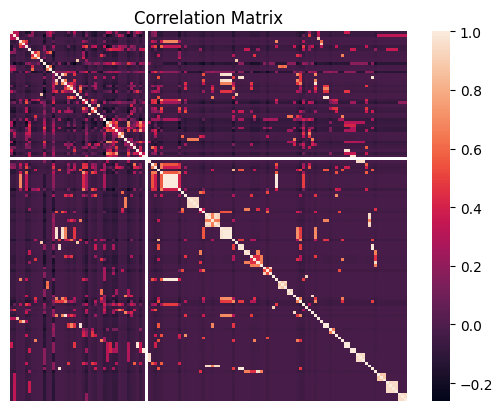

In [ ]:
sns.heatmap(X_train.corr(),xticklabels=[],yticklabels=[])
plt.title('Correlation Matrix')
plt.show()

In [ ]:
op_labels = y_train.unique()
op_labels

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

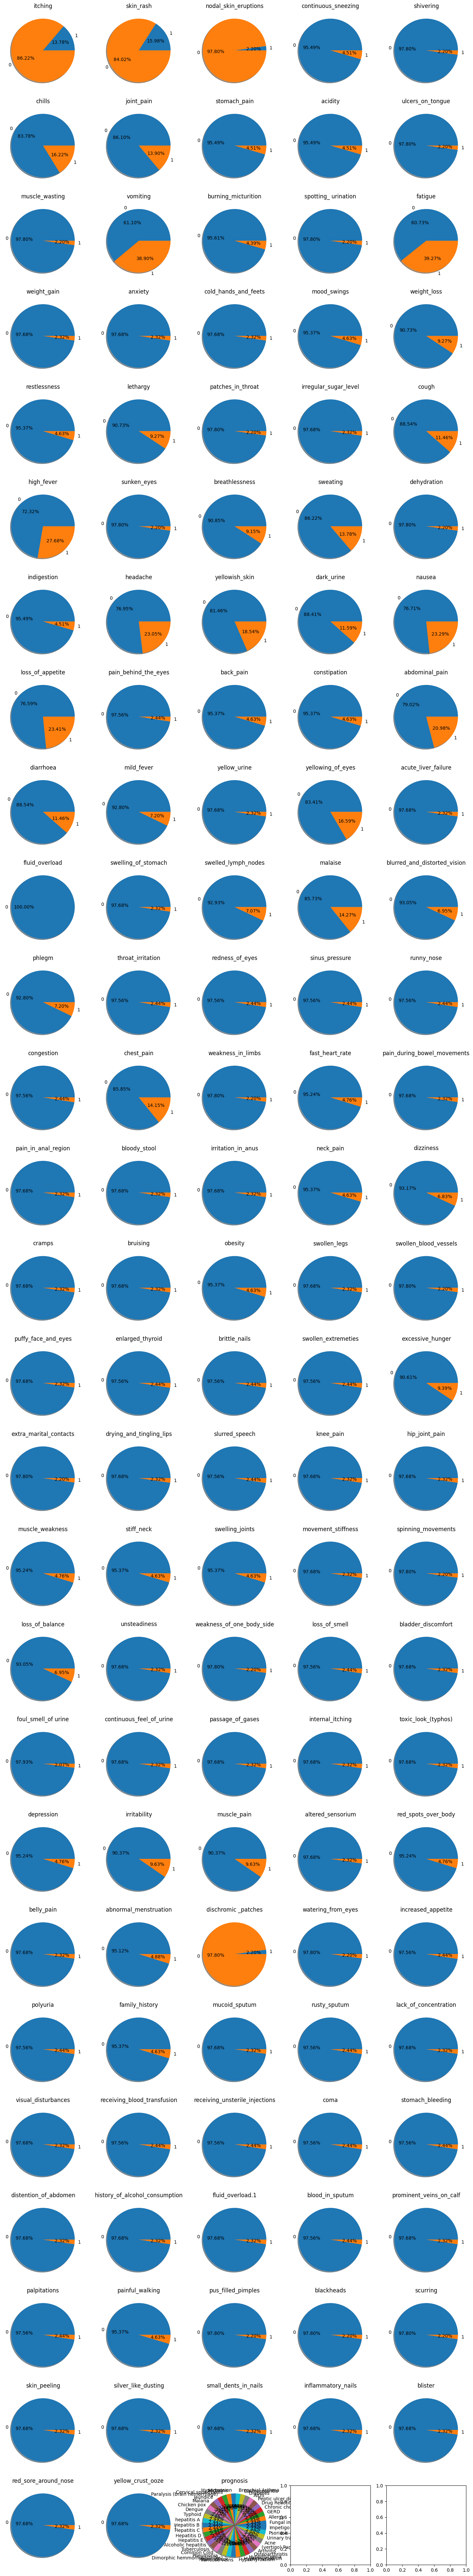

In [ ]:
fig, axs = plt.subplots(27,5,figsize=(18,100))
numpie = 0
for col in traindf.columns:
  dist = {}
  for unique_val in traindf[col].unique():
    num = sum(traindf[col]==unique_val)
    dist[unique_val] = num 
  axs[numpie//5, numpie%5].pie([value for key,value in dist.items()], labels = dist.keys(), shadow=True, autopct='%1.2f%%')
  axs[numpie//5, numpie%5].set_title(col)
  numpie+=1
plt.show()

In [ ]:
def similarity(ser1, ser2):
  length = len(ser1)
  same = sum([ser1[i]==ser2[i] for i in range(len(ser1))])
  return same/ length

In [ ]:
# Finding what all columns are same and hence not a deciding factor
num_col = 132
similarity_Arr = []
for i in range(num_col):
  temp = []
  for j in range(num_col):
    temp.append(similarity(traindf.iloc[i,:],traindf.iloc[j,:]))
  similarity_Arr.append(temp)
similarity_Arr = np.array(similarity_Arr)

In [ ]:
redundant_cols = np.where(similarity_Arr==1,1,0)

In [ ]:
redundant_cols

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
Col_to_drop = set()

In [ ]:

for col_ind in range(132):
  similar_cols = []
  for i in range(col_ind+1,132):
    if redundant_cols[col_ind][i] == 1:
      similar_cols.append(traindf.columns[i])
  Col_to_drop.update(similar_cols)
  print(f'Columns that are similar to {traindf.columns[col_ind]} are: {similar_cols}')

Columns that are similar to itching are: ['ulcers_on_tongue']
Columns that are similar to skin_rash are: ['chills']
Columns that are similar to nodal_skin_eruptions are: ['joint_pain']
Columns that are similar to continuous_sneezing are: ['stomach_pain']
Columns that are similar to shivering are: ['acidity']
Columns that are similar to chills are: []
Columns that are similar to joint_pain are: []
Columns that are similar to stomach_pain are: []
Columns that are similar to acidity are: []
Columns that are similar to ulcers_on_tongue are: []
Columns that are similar to muscle_wasting are: ['weight_loss']
Columns that are similar to vomiting are: ['weight_gain']
Columns that are similar to burning_micturition are: ['anxiety']
Columns that are similar to spotting_ urination are: ['cold_hands_and_feets']
Columns that are similar to fatigue are: ['mood_swings']
Columns that are similar to weight_gain are: []
Columns that are similar to anxiety are: []
Columns that are similar to cold_hands_a

In [ ]:
len(Col_to_drop)

45

In [ ]:
# There are 45 redundant values as they are similar to some other column completely
traindf.drop(Col_to_drop, axis=1, inplace=True)

In [ ]:
testdf.drop(Col_to_drop, axis=1, inplace=True)

In [ ]:
traindf.sample(5)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
1094        0          0                     0                    0   
23          0          0                     0                    0   
1969        0          0                     0                    0   
368         0          0                     0                    0   
3259        1          0                     0                    0   

      shivering  muscle_wasting  vomiting  burning_micturition  \
1094          0               0         0                    0   
23            0               0         0                    0   
1969          0               0         0                    0   
368           0               0         1                    0   
3259          0               0         0                    0   

      spotting_ urination  fatigue  ...  blood_in_sputum  \
1094                    0        0  ...                0   
23                      0        0  ...                0   
1969                    0        1  ...                0   
368                     0        0  ...                0   
3259                    0        1  ...                0   

      prominent_veins_on_calf  palpitations  pus_filled_pimples  blackheads  \
1094                        0             0                   0           0   
23                          0             0                   0           0   
1969                        0             0                   0           0   
368                         0             0                   0           0   
3259                        0             0                   0           0   

      scurring  skin_peeling  silver_like_dusting  red_sore_around_nose  \
1094         0             0                    0                     0   
23           0             0                    0                     0   
1969         0             0                    0                     0   
368          0             0                    0                     0   
3259         0             0                    0                     0   

                                    prognosis  
1094                                Pneumonia  
23                                       GERD  
1969                          Hyperthyroidism  
368   (vertigo) Paroymsal  Positional Vertigo  
3259                              Hepatitis B  

[5 rows x 88 columns]

<Axes: >

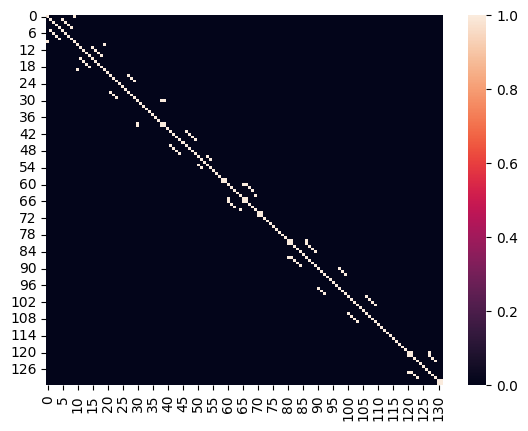

In [ ]:
sns.heatmap(redundant_cols)

In [ ]:
X_train = traindf.iloc[:,:-1]

y_train = traindf.iloc[:,-1]

In [ ]:
X_test = testdf.iloc[:,:-1]

y_test = testdf.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state=42)

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()
y_train = le.fit_transform(y_train)
y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()

# y_val = le.transform(Y_val)
# y_val = ohe.transform(Y_val.reshape(-1,1)).toarray()


In [ ]:
y_val = le.fit_transform(y_val)
y_val = ohe.fit_transform(y_val.reshape(-1,1)).toarray()


In [ ]:
y_test = le.fit_transform(testdf.iloc[:,-1])
y_test = ohe.fit_transform(y_test.reshape(-1,1)).toarray()

In [ ]:
y_val

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train.shape

(3936, 41)

In [ ]:
len(X_train)

3936

# WEEK 4 
* Model building by referrin to various architecture
* Learning about different layers and their working
* Learning about optimizers, activation functions

In [ ]:
# Model building. Model - ANN
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, SGD
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Input

def build_model(optimizer='rmsprop'):
  ann = Sequential()

  ann.add(Input(shape=(X_train.shape[1]), name="Input Layer"))
  ann.add(Dense(64,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(128,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(256,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(512,activation='relu'))
  ann.add(Dropout(0.3))

  ann.add(Dense(128,activation='relu'))
  ann.add(Dense(256,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(256,activation='relu'))
  ann.add(Dropout(0.1))

  ann.add(Dense(512,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(512,activation='relu'))
  ann.add(Dropout(0.3))

  ann.add(Dense(256,activation='relu'))
  ann.add(Dense(128,activation='relu'))
  ann.add(Dense(64,activation='relu'))
  ann.add(Dropout(0.2))

  ann.add(Dense(64,activation='relu'))
  ann.add(Dense(len(op_labels), activation='softmax'))
  
  ann.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return ann

# WEEK 5
## Hyperparameter Tuning

Tuning various parameters:
* Batch size
* Number of epochs
* Optimzers


In [ ]:
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

classifier = KerasClassifier(model = build_model,  verbose = 1)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64],
              'epochs': [i for i in range(10,51,10)],
              'optimizer': ['adam', 'rmsprop', 'sgd']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)


In [ ]:
grid_search_res = grid_search.fit(X_train, y_train, verbose = 2)


Streaming output truncated to the last 5000 lines.
99/99 - 0s - loss: 0.1243 - accuracy: 0.9755 - 499ms/epoch - 5ms/step
Epoch 41/50
99/99 - 0s - loss: 0.0939 - accuracy: 0.9794 - 495ms/epoch - 5ms/step
Epoch 42/50
99/99 - 1s - loss: 0.1235 - accuracy: 0.9768 - 514ms/epoch - 5ms/step
Epoch 43/50
99/99 - 0s - loss: 0.0873 - accuracy: 0.9819 - 499ms/epoch - 5ms/step
Epoch 44/50
99/99 - 1s - loss: 0.1374 - accuracy: 0.9790 - 505ms/epoch - 5ms/step
Epoch 45/50
99/99 - 1s - loss: 0.1276 - accuracy: 0.9781 - 505ms/epoch - 5ms/step
Epoch 46/50
99/99 - 0s - loss: 0.0922 - accuracy: 0.9825 - 495ms/epoch - 5ms/step
Epoch 47/50
99/99 - 1s - loss: 0.1167 - accuracy: 0.9809 - 503ms/epoch - 5ms/step
Epoch 48/50
99/99 - 1s - loss: 0.1392 - accuracy: 0.9800 - 506ms/epoch - 5ms/step
Epoch 49/50
99/99 - 0s - loss: 0.0986 - accuracy: 0.9813 - 493ms/epoch - 5ms/step
Epoch 50/50
99/99 - 1s - loss: 0.0893 - accuracy: 0.9848 - 672ms/epoch - 7ms/step
25/25 [==============================] - 0s 5ms/step
Epoch 

In [ ]:
grid_search_res

GridSearchCV(cv=5,
             estimator=KerasClassifier(model=<function build_model at 0x7f6ca041c280>),
             param_grid={'batch_size': [16, 32, 64],
                         'epochs': [10, 20, 30, 40, 50],
                         'optimizer': ['adam', 'rmsprop', 'sgd']},
             scoring='accuracy')

In [ ]:
best_params = grid_search_res.best_params_
best_params

{'batch_size': 16, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
grid_search_res.best_score_

0.9974593489380092

In [ ]:
combination = grid_search_res.cv_results_['params']
cv_Results = grid_search_res.cv_results_['mean_test_score']
cv_Results

array([0.77413296, 0.72714414, 0.76855211, 0.97738311, 0.99263089,
       0.98679171, 0.99339553, 0.99644283, 0.99669761, 0.99542631,
       0.99618967, 0.99695109, 0.99745935, 0.99745935, 0.99720522,
       0.57087346, 0.54345552, 0.56629654, 0.90069079, 0.94078941,
       0.92532105, 0.99263347, 0.99695109, 0.9842459 , 0.9961887 ,
       0.99568044, 0.99720522, 0.99669696, 0.99568044, 0.99161437,
       0.3104793 , 0.2980205 , 0.31479112, 0.73576132, 0.72488116,
       0.73455614, 0.92608053, 0.90623843, 0.9199653 , 0.99288631,
       0.94282955, 0.97637401, 0.99745935, 0.98856481, 0.99618999])

In [ ]:
print('\t\tCombination \t\t\t\t\t Accuracy')
print('#'*100)
for i,comb in enumerate(combination):
  print(f'{comb}:\t\t{cv_Results[i]}')

		Combination 					 Accuracy
####################################################################################################
{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}:		0.7741329600939119
{'batch_size': 16, 'epochs': 10, 'optimizer': 'rmsprop'}:		0.7271441379265862
{'batch_size': 16, 'epochs': 10, 'optimizer': 'sgd'}:		0.7685521062442353
{'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}:		0.9773831100561795
{'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop'}:		0.992630886422126
{'batch_size': 16, 'epochs': 20, 'optimizer': 'sgd'}:		0.9867917104728487
{'batch_size': 16, 'epochs': 30, 'optimizer': 'adam'}:		0.9933955327369244
{'batch_size': 16, 'epochs': 30, 'optimizer': 'rmsprop'}:		0.9964428305136126
{'batch_size': 16, 'epochs': 30, 'optimizer': 'sgd'}:		0.9966976051187121
{'batch_size': 16, 'epochs': 40, 'optimizer': 'adam'}:		0.9954263120892163
{'batch_size': 16, 'epochs': 40, 'optimizer': 'rmsprop'}:		0.996189668406014
{'batch_size': 16, 'epochs': 40, 'opti

In [ ]:
avg_sc = {}
num_sc =  {}
for i,comb in enumerate(combination):
  if comb['optimizer'] not in avg_sc.keys():
    avg_sc[comb['optimizer']] = cv_Results[i]
  else:
    avg_sc[comb['optimizer']] += cv_Results[i]

  if (comb['optimizer']) not in num_sc.keys():
    num_sc[comb['optimizer']] = 1
  else:
    num_sc[comb['optimizer']] += 1

best_opt_ = ''
best_sc = 0
for opt_, sc in avg_sc.items():
  if best_sc < (sc/num_sc[opt_]):
    best_sc = sc/num_sc[opt_]
    best_opt_ = opt_

In [ ]:
best_opt_

'adam'

# WEEK 6

* Building final model with best set of parameters
* Training the model with the given data set
* Testing the model and its result analysis 


In [ ]:
ann = Sequential()

ann.add(Input(shape=(X_train.shape[1]), name="Input Layer"))
ann.add(Dense(64,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(128,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(512,activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(128,activation='relu'))
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.1))

ann.add(Dense(512,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(512,activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(256,activation='relu'))
ann.add(Dense(128,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(64,activation='relu'))
ann.add(Dense(len(op_labels), activation='softmax'))
ann.compile(optimizer=Adam(2e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X_train.shape)


(3936, 87)


In [ ]:
testdf

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   

    muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0                0         0                    0                    0   
1                0         0                    0                    0   
2                0         1                    0                    0   
3                0         1                    0                    0   
4                0         0                    1                    1   
5                0         1                    0                    0   
6                1         0                 

In [ ]:
b_size = 16  #best_params['batch_size']
epochs = 50 #best_params['epochs']
history = ann.fit(X_train,y_train,batch_size = b_size, epochs = epochs,validation_data=(X_val,y_val))

Epoch 1/50
246/246 [==============================] - 6s 8ms/step - loss: 3.5974 - accuracy: 0.0295 - val_loss: 3.3787 - val_accuracy: 0.0457
Epoch 2/50
246/246 [==============================] - 2s 7ms/step - loss: 3.0880 - accuracy: 0.0747 - val_loss: 2.5905 - val_accuracy: 0.1524
Epoch 3/50
246/246 [==============================] - 1s 5ms/step - loss: 2.6429 - accuracy: 0.1291 - val_loss: 2.3148 - val_accuracy: 0.1758
Epoch 4/50
246/246 [==============================] - 1s 5ms/step - loss: 2.3611 - accuracy: 0.1898 - val_loss: 1.9336 - val_accuracy: 0.2856
Epoch 5/50
246/246 [==============================] - 1s 5ms/step - loss: 2.1039 - accuracy: 0.2289 - val_loss: 1.6357 - val_accuracy: 0.3445
Epoch 6/50
246/246 [==============================] - 1s 5ms/step - loss: 1.9128 - accuracy: 0.2840 - val_loss: 1.4419 - val_accuracy: 0.3750
Epoch 7/50
246/246 [==============================] - 1s 5ms/step - loss: 1.6955 - accuracy: 0.3572 - val_loss: 1.1724 - val_accuracy: 0.5579
Epoch 

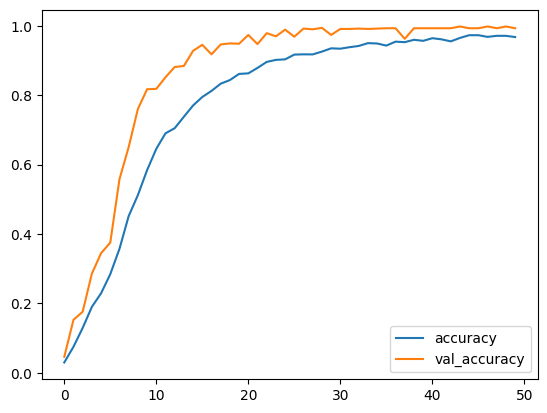

In [ ]:
acc_plot = plt.plot(history.history['accuracy'],label='accuracy')
val_acc_plot = plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

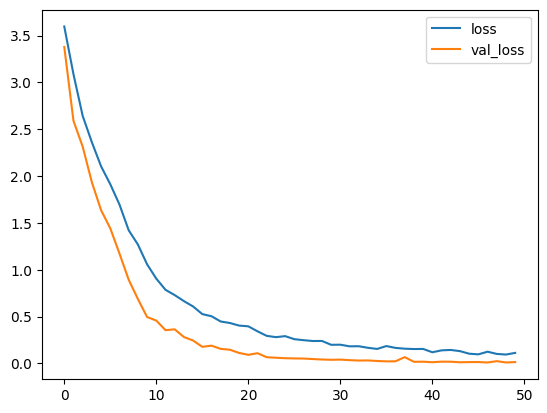

In [ ]:
acc_plot = plt.plot(history.history['loss'],label='loss')
val_acc_plot = plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Evaluation and testing on Test data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_test.shape

(42, 87)

In [ ]:
y_test.shape

(42, 41)

In [ ]:
y_pred = ann.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_act = np.argmax(y_test,axis=1)

In [ ]:
y_pred

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 14])

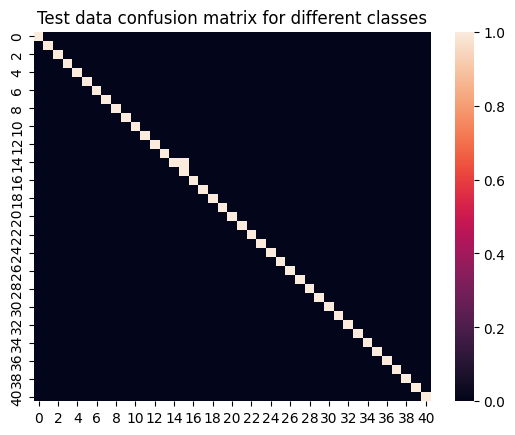

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_act))
plt.title('Test data confusion matrix for different classes')
plt.show()

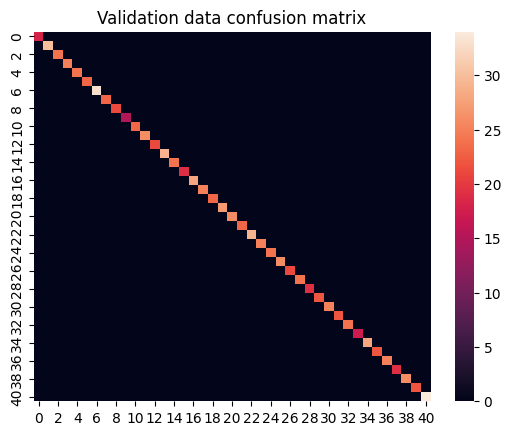

In [ ]:
y_pred = np.argmax(y_val,axis=1)
y_act = np.argmax(y_val,axis=1)
sns.heatmap(confusion_matrix(y_pred,y_act))
plt.title('Validation data confusion matrix')
plt.show()

In [ ]:
op_labels

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
y_test.shape

(42, 41)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred_ = np.zeros(y_test.shape)
for i,maxind in enumerate(y_pred):
  y_pred_[i][maxind] += 1
y_pred_

2/2 [==============================] - 0s 5ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

####################################################################################################


<Figure size 800x800 with 0 Axes>

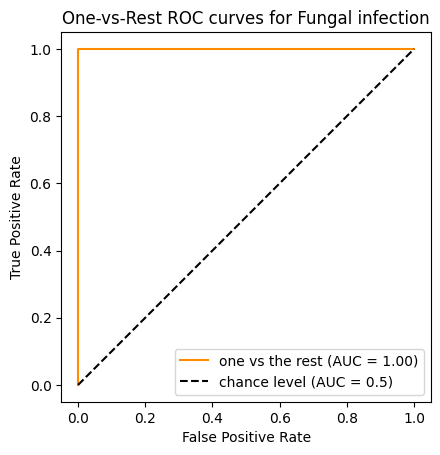

####################################################################################################


<Figure size 800x800 with 0 Axes>

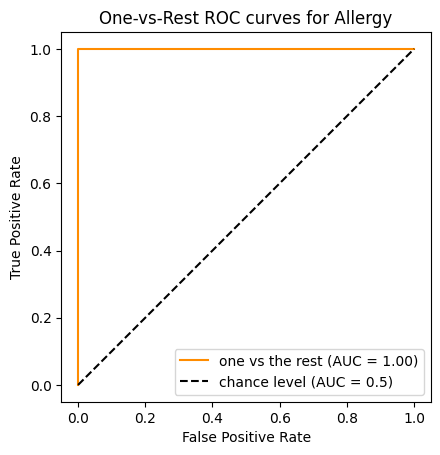

####################################################################################################


<Figure size 800x800 with 0 Axes>

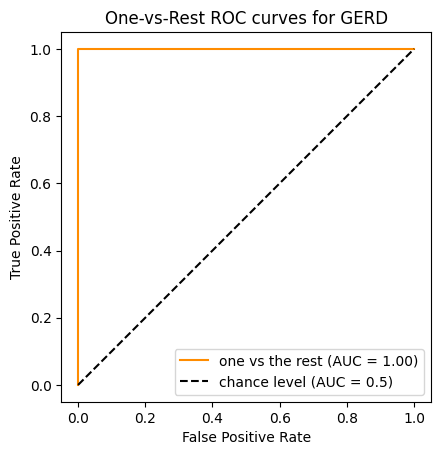

####################################################################################################


<Figure size 800x800 with 0 Axes>

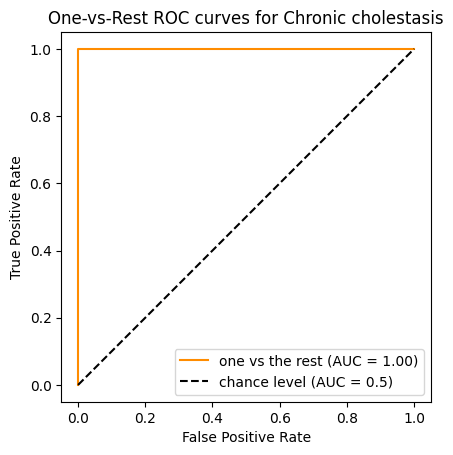

####################################################################################################


<Figure size 800x800 with 0 Axes>

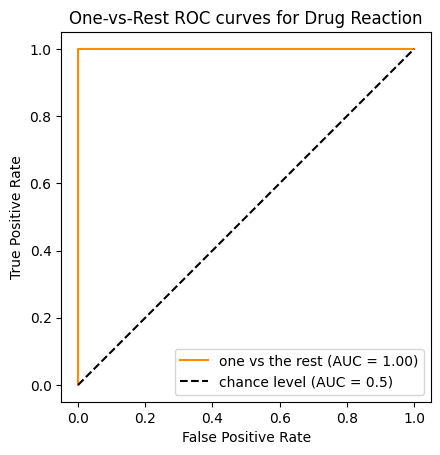

####################################################################################################


<Figure size 800x800 with 0 Axes>

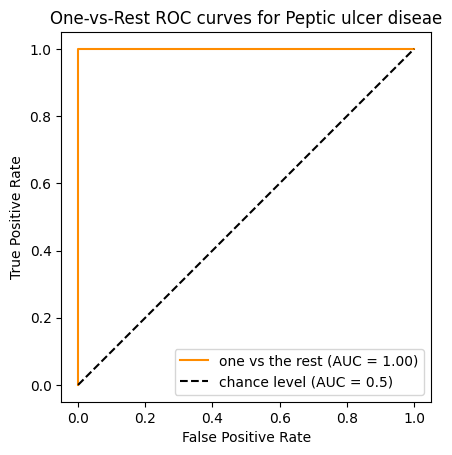

####################################################################################################


<Figure size 800x800 with 0 Axes>

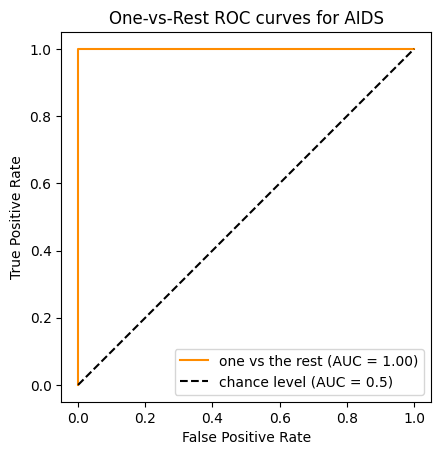

####################################################################################################


<Figure size 800x800 with 0 Axes>

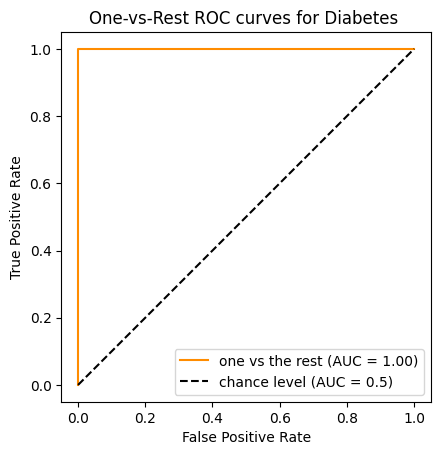

####################################################################################################


<Figure size 800x800 with 0 Axes>

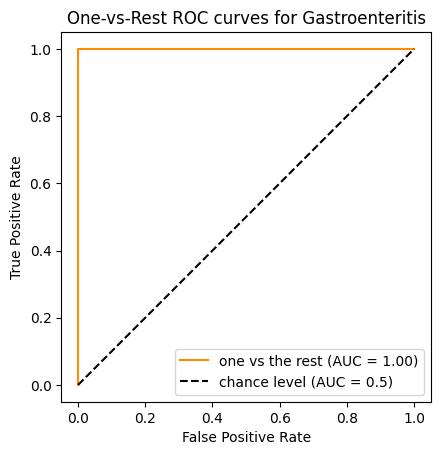

####################################################################################################


<Figure size 800x800 with 0 Axes>

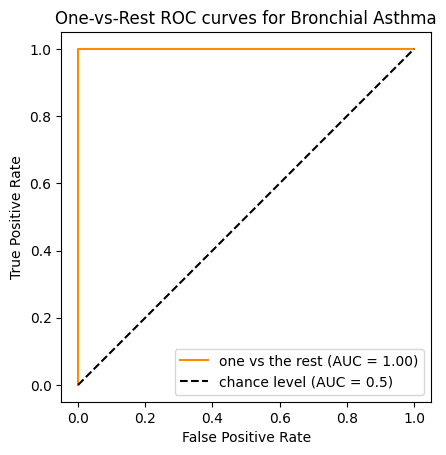

####################################################################################################


<Figure size 800x800 with 0 Axes>

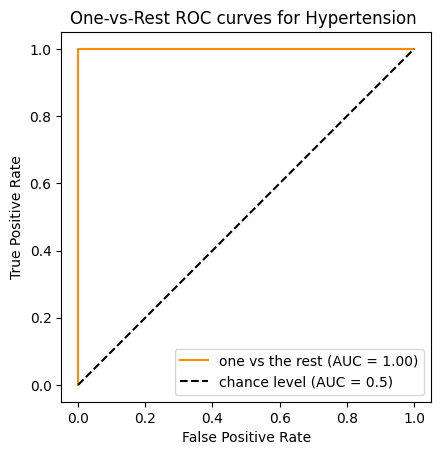

####################################################################################################


<Figure size 800x800 with 0 Axes>

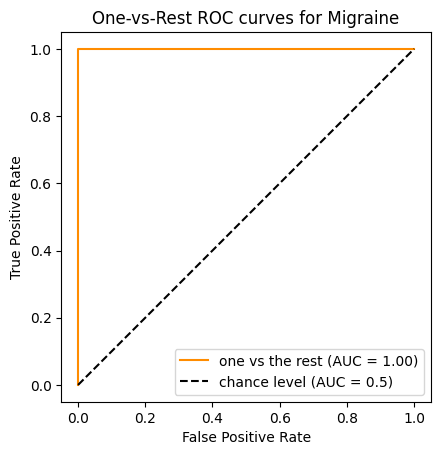

####################################################################################################


<Figure size 800x800 with 0 Axes>

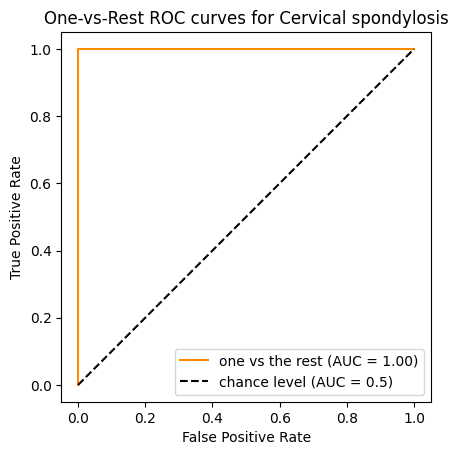

####################################################################################################


<Figure size 800x800 with 0 Axes>

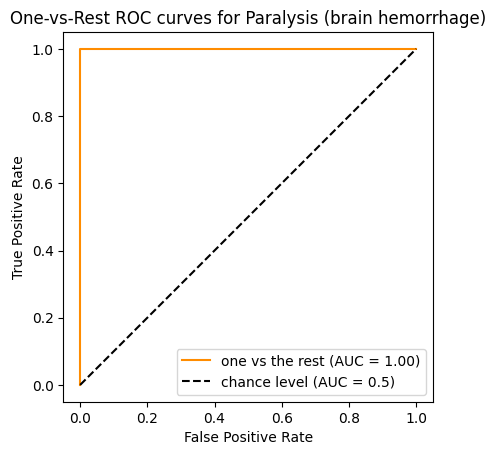

####################################################################################################


<Figure size 800x800 with 0 Axes>

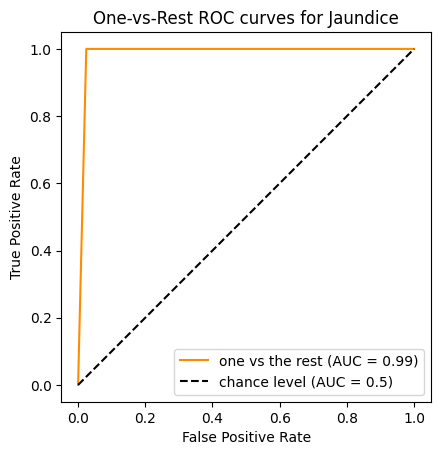

####################################################################################################


<Figure size 800x800 with 0 Axes>

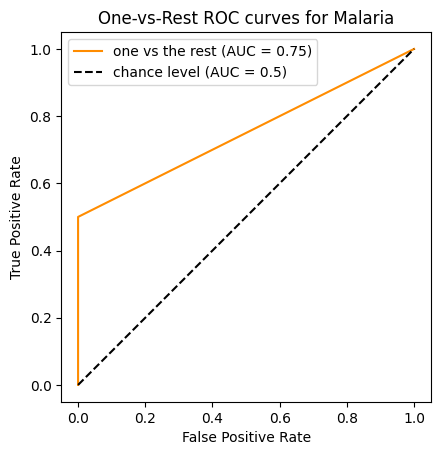

####################################################################################################


<Figure size 800x800 with 0 Axes>

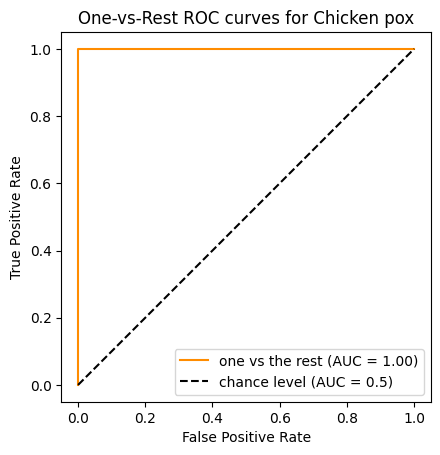

####################################################################################################


<Figure size 800x800 with 0 Axes>

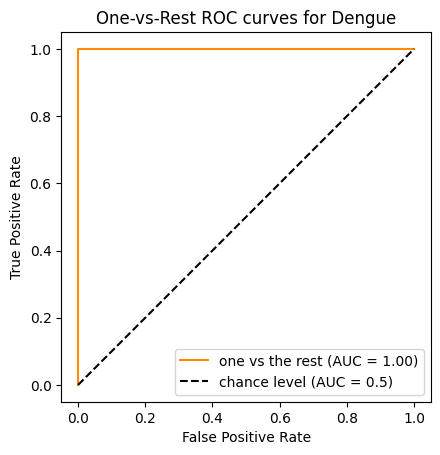

####################################################################################################


<Figure size 800x800 with 0 Axes>

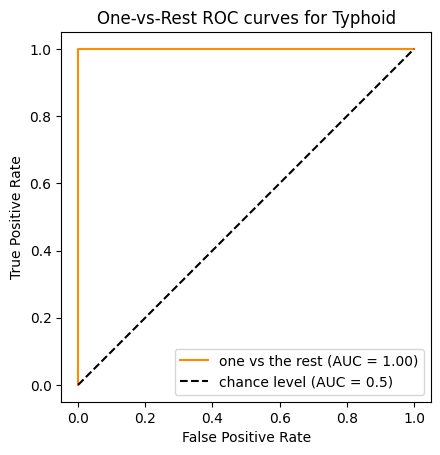

####################################################################################################


<Figure size 800x800 with 0 Axes>

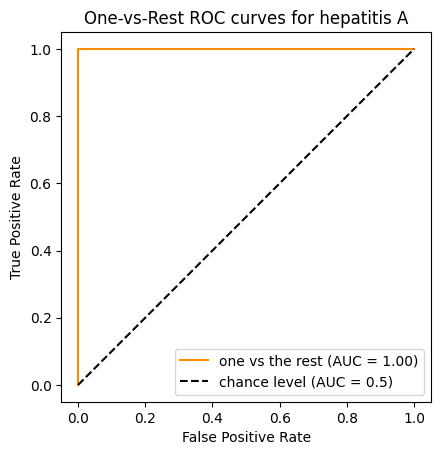

####################################################################################################


<Figure size 800x800 with 0 Axes>

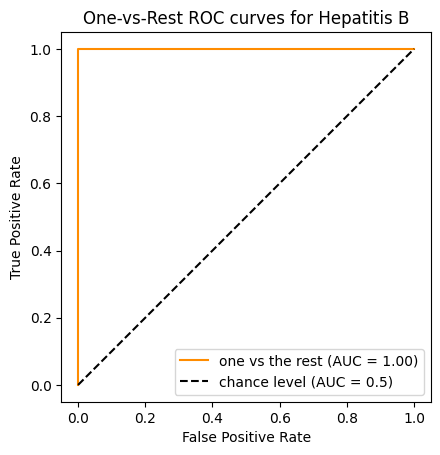

####################################################################################################


<Figure size 800x800 with 0 Axes>

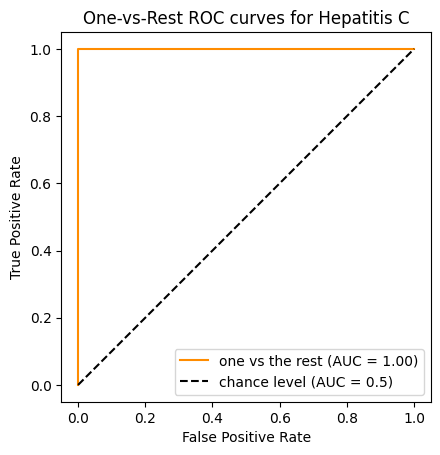

####################################################################################################


<Figure size 800x800 with 0 Axes>

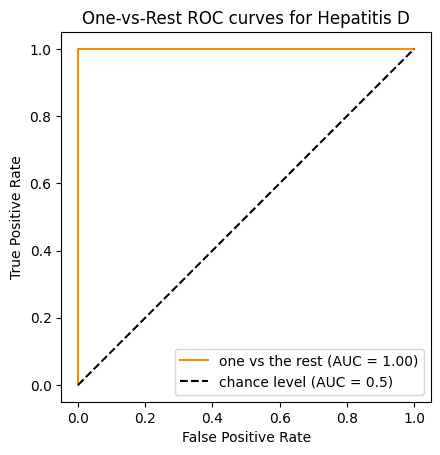

####################################################################################################


<Figure size 800x800 with 0 Axes>

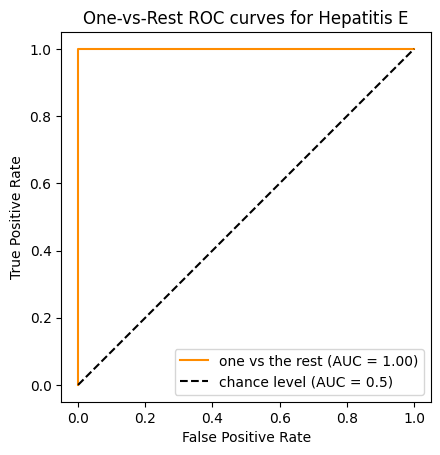

####################################################################################################


<Figure size 800x800 with 0 Axes>

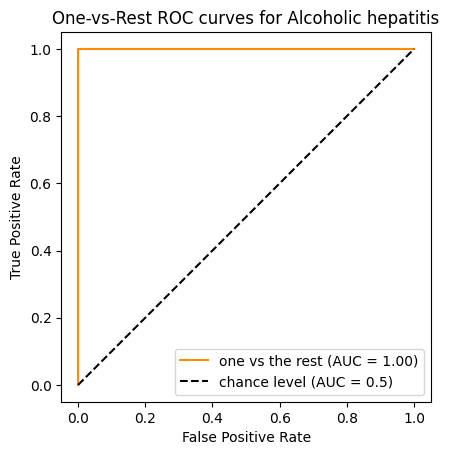

####################################################################################################


<Figure size 800x800 with 0 Axes>

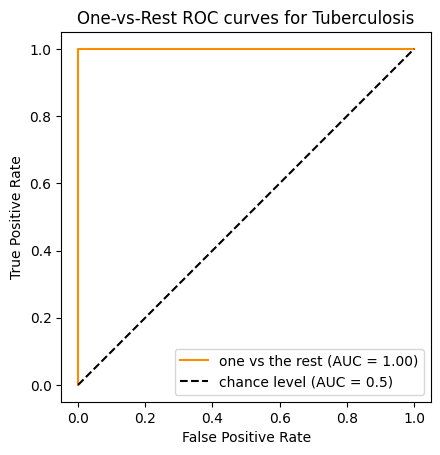

####################################################################################################


<Figure size 800x800 with 0 Axes>

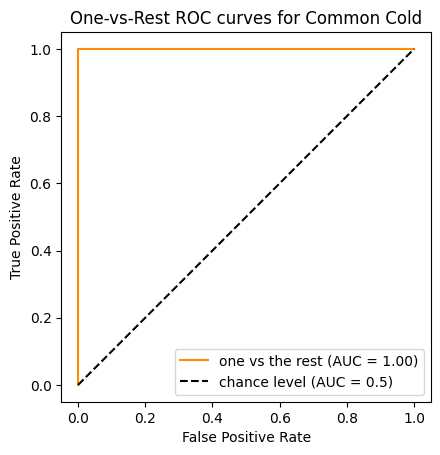

####################################################################################################


<Figure size 800x800 with 0 Axes>

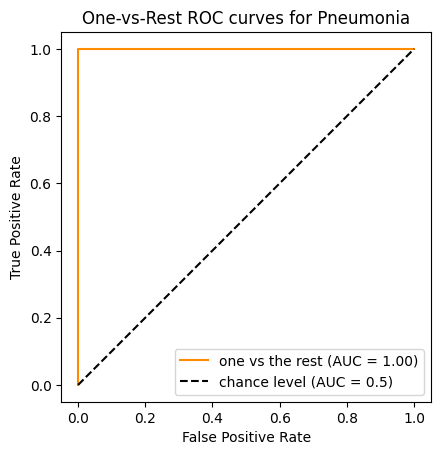

####################################################################################################


<Figure size 800x800 with 0 Axes>

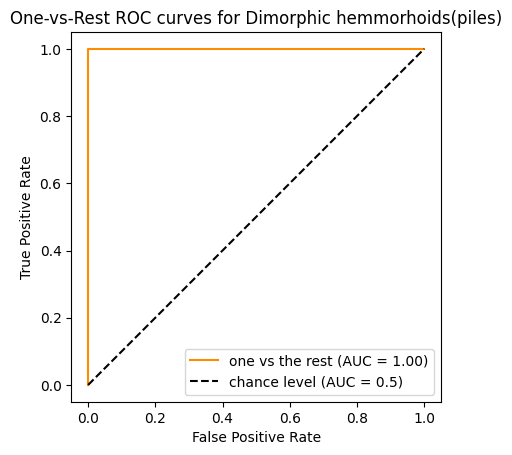

####################################################################################################


<Figure size 800x800 with 0 Axes>

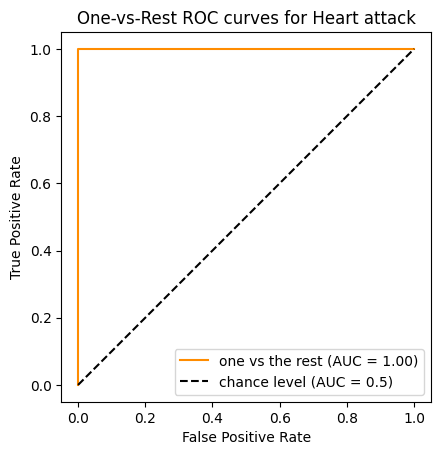

####################################################################################################


<Figure size 800x800 with 0 Axes>

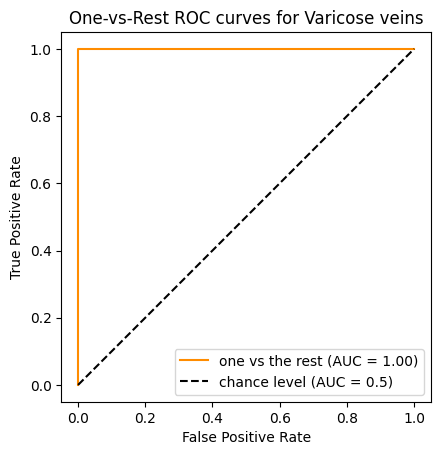

####################################################################################################


<Figure size 800x800 with 0 Axes>

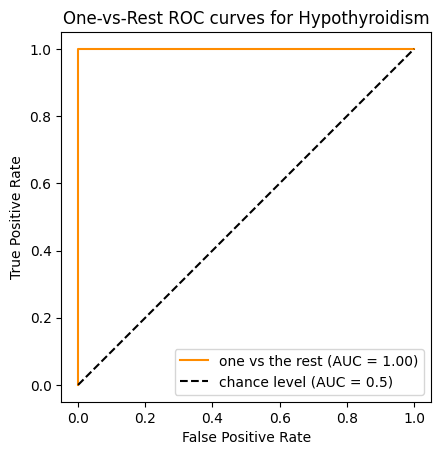

####################################################################################################


<Figure size 800x800 with 0 Axes>

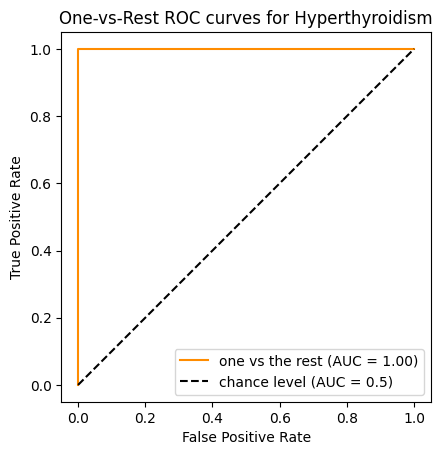

####################################################################################################


<Figure size 800x800 with 0 Axes>

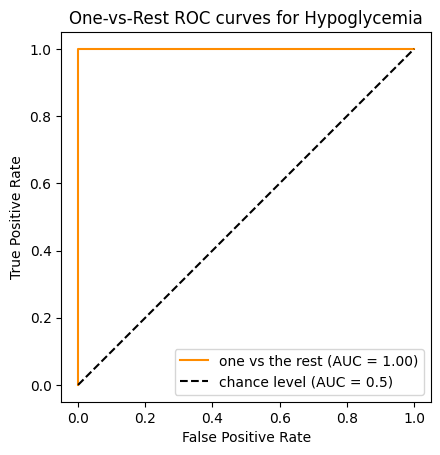

####################################################################################################


<Figure size 800x800 with 0 Axes>

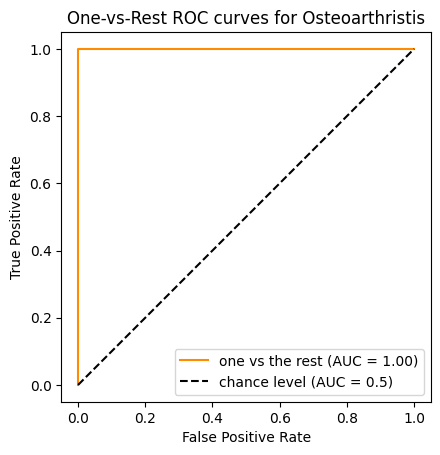

####################################################################################################


<Figure size 800x800 with 0 Axes>

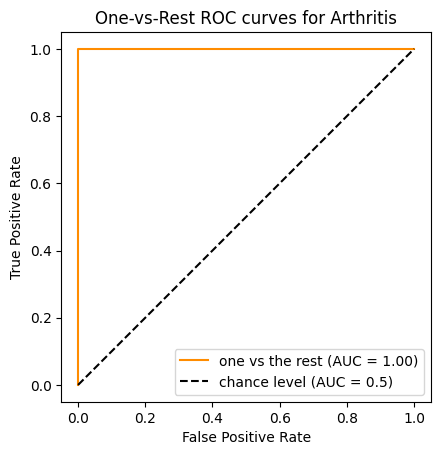

####################################################################################################


<Figure size 800x800 with 0 Axes>

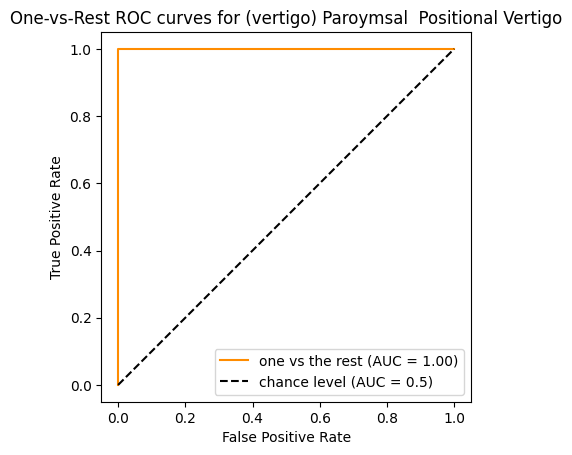

####################################################################################################


<Figure size 800x800 with 0 Axes>

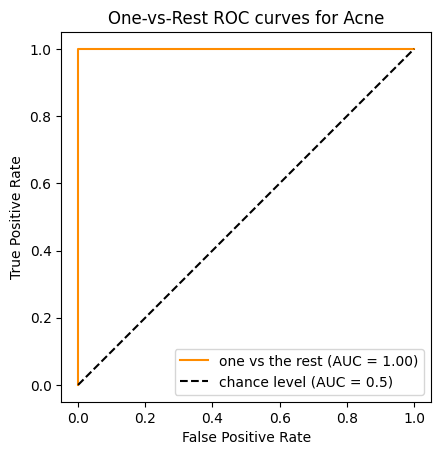

####################################################################################################


<Figure size 800x800 with 0 Axes>

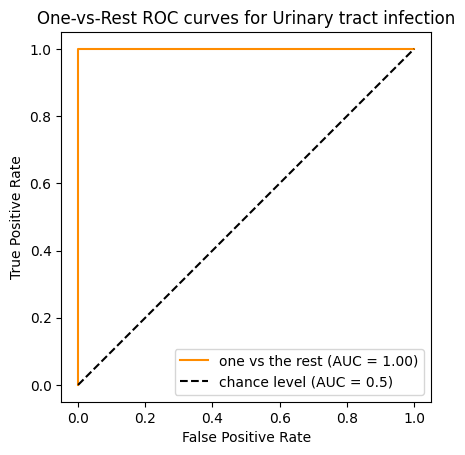

####################################################################################################


<Figure size 800x800 with 0 Axes>

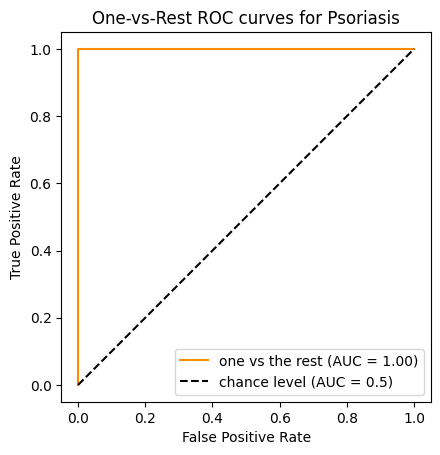

####################################################################################################


<Figure size 800x800 with 0 Axes>

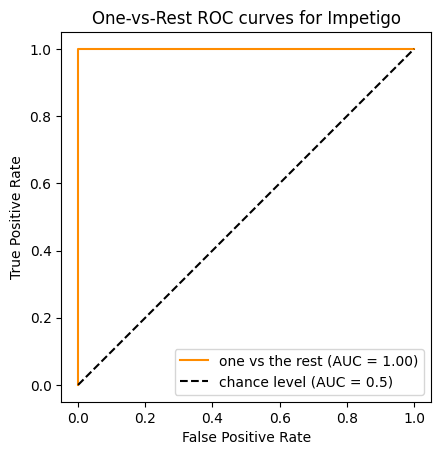

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


for i in range(len(op_labels)):
  plt.figure(figsize=(8,8))
  print('#'*100)
  RocCurveDisplay.from_predictions(
      y_test[:,i],
      y_pred_[:,i],
      name=f"one vs the rest",
      color="darkorange",
  )
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"One-vs-Rest ROC curves for {op_labels[i]}")
  plt.legend()
  plt.show()

# WEEK 7

* Comparing with some other model and their performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import cv2
from sklearn.metrics import classification_report

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=20)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=20)

In [ ]:

traindf['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [ ]:
cn=le.inverse_transform(ohe.inverse_transform(y_train))


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8571428571428571

<Axes: >

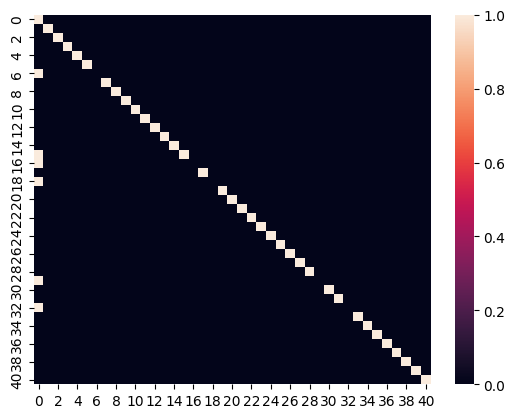

In [ ]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

### Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=7)
lr.fit(X_train,ohe.inverse_transform(y_train))

y_pred = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(ohe.inverse_transform(y_test),y_pred)

0.9761904761904762

<Axes: >

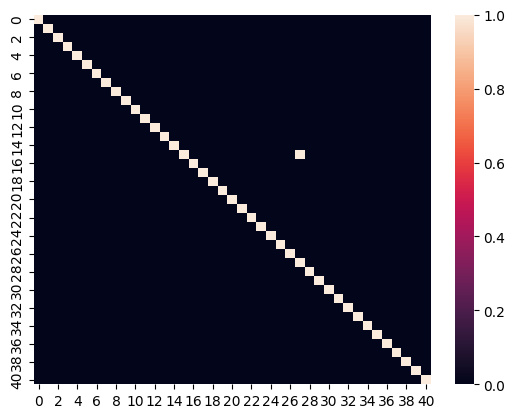

In [ ]:
sns.heatmap(confusion_matrix(ohe.inverse_transform(y_test),y_pred))

### KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,ohe.inverse_transform(y_train))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
accuracy_score(ohe.inverse_transform(y_test),y_pred)

0.9761904761904762

<Axes: >

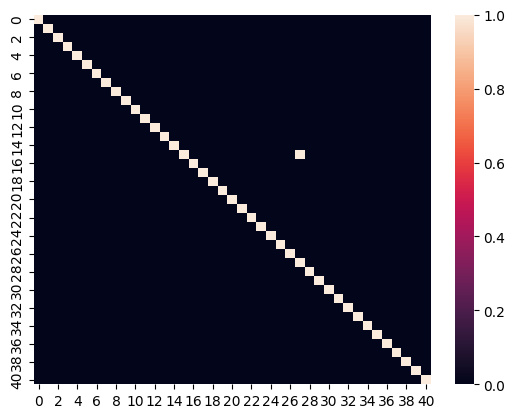

In [ ]:
sns.heatmap(confusion_matrix(ohe.inverse_transform(y_test),y_pred))